# ✨💻 Trabalho 1 - Atividade Prática

##🔍Equipe: Ariane Barros e Camila Perazzo

# Importação geral

In [69]:
!pip install opencv-python

In [70]:
!pip install colortrans

In [71]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import requests
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pywt
import matplotlib.pylab as pylab
import colortrans


In [72]:
from PIL import Image
from google.colab.patches import cv2_imshow
from skimage.io import imread
from io import BytesIO

# Enunciado 1

**Artigo 1 - Uso de visão computacional para análise de postura de usuário de smartphone**

Esse artigo analisa a performance de algoritmos de visão computacional embarcados em smartphones e tablets. Por meio de camêras com sensor de profundidade (TrueDeph) e framework Core ML, da Apple, foi avaliado em smartphone IOS. Primeiramente são identificados os pontos de articulação, e então seus ângulos de inclinação em relação ao eixo vertical e horizontal. A pesquisa cobriu 3 cenários: ADM (amplitude do movimento) da cervical, postura frontal e postura lateral do corpo. A plataforma obteve

**REFERÊNCIA 1:** https://adelpha-api.mackenzie.br/server/api/core/bitstreams/e1277a1d-d53d-4846-abe5-eb66f661a8cf/content


**Artigo 2 - Detecção de Plantas Daninhas em Culturas de Soja usando Redes Neurais Convolucionais**

Neste artigo, os pesquisadores utilizaram a tecnologia de Redes Neurais Convolucionais, ConvNets, para detectar ervas daninhas em lavouras de soja, classificando-as em gramíneas e folhas largas. Eles coletaram imagens de lavouras de soja usando um drone Phantom DJI 3 Professional e criaram um extenso banco de dados com mais de quinze mil imagens de solo, soja e plantas daninhas. Para treinar a rede neural, eles utilizaram a arquitetura CaffeNet. Além disso,  um software chamado Pynovisão foi desenvolvido para segmentar as imagens usando o algoritmo SLIC e classificar as plantas com base no modelo treinado. Os resultados mostraram uma precisão superior a 98% na detecção de ervas daninhas em relação ao solo e à soja, com uma média de precisão acima de 99% em todas as imagens. Esta abordagem de Deep Learning oferece uma solução promissora para o controle de plantas daninhas em culturas de soja, melhorando a eficiência e a qualidade da produção agrícola.

**REFERÊNCIA 2:** https://www.sciencedirect.com/science/article/abs/pii/S0168169917301977?via%3Dihub

**Matéria 1 - Baidu supera performance de Google e Microsoft no reconhecimento de imagens**

Um time de desenvolvimento na área de deep learning na visão computacional do navegador chinês Baidu superou o Google e Microsoft no reconhecimento de imagens. O uso de uma imensa infrastrutura de hardwares foi um dos fatores que ajudou a superação da performance, foram utilizados "supercomputadores", no total de 432 CPUs. Outra estratégia interessante que foi utilizada para previnir overfitting foi a modificação da imagem de input com filtro de cores. Outro ponto interessante mencionado no artigo é que esse time chegou a uma taxa de erro de 4.58%, enquanto a taxa para humanos é mais perto de 5%. Esses resultados não representam como verdade absoluta que máquinas superaram humanos no reconhecimento de imagens, mas é um sinal que o uso de redes neurais está evoluindo.

**REFERÊNCIA 3:** https://www.theguardian.com/global/2015/may/13/baidu-minwa-supercomputer-better-than-humans-recognising-images

**Matéria 2 - Nova Inteligência Artificial Acelera Visão Computacional de Alta Resolução**

Pesquisadores do MIT desenvolveram um modelo de visão computacional mais eficiente, chamado EfficientViT, que acelera a segmentação semântica em tempo real, ideal para veículos autônomos e outras tarefas de visão de alta resolução. Enquanto modelos anteriores cresceram em complexidade quadrática com a resolução da imagem, o EfficientViT mantém complexidade linear, sendo até nove vezes mais rápido com a mesma precisão. Além disso, o modelo apresentado usa um mecanismo mais simples para construir o mapa de atenção, equilibrando eficiência e desempenho, e é projetado para funcionar em dispositivos com recursos limitados, como veículos autônomos e dispositivos móveis.

**REFERÊNCIA 1:** https://news.mit.edu/2023/ai-model-high-resolution-computer-vision-0912

# Enunciado 2

<ipython-input-73-594db68549d4>:52: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freq, np.abs(fft_result), basefmt=" ", use_line_collection=True)  # Usar stem para FFT


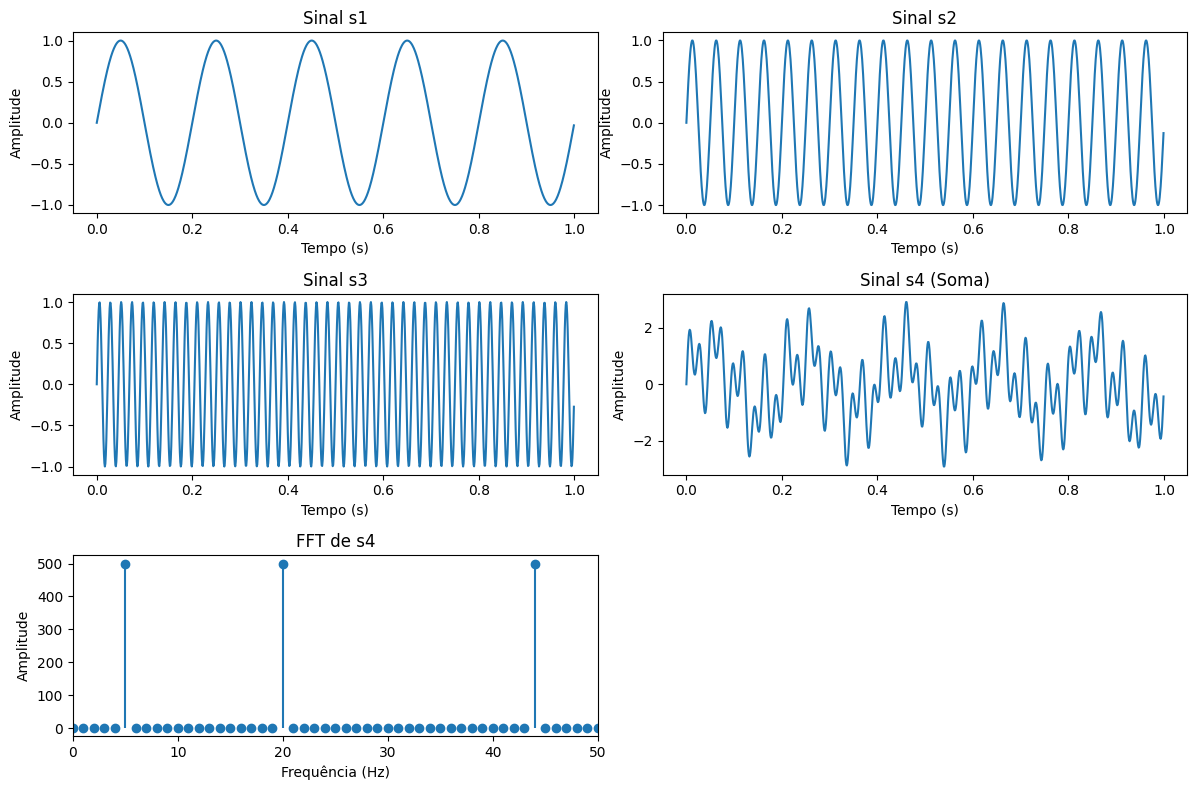

In [73]:
fs = 1000  # Frequência de amostragem em Hz
t = np.arange(0, 1, 1/fs)  # Vetor de tempo de 1 segundo

# s1
f1 = 5
s1 = np.sin(2 * np.pi * f1 * t)

# s2
f2 = 20
s2 = np.sin(2 * np.pi * f2 * t)

# s3
f3 = 44
s3 = np.sin(2 * np.pi * f3 * t)

# O sinal s4 composto pela soma dos três sinais anteriores
s4 = s1 + s2 + s3

# FFT em s4
fft_result = np.fft.fft(s4)
freq = np.fft.fftfreq(len(fft_result), 1/fs)

# Plotagem dos Sinais e FFT
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=1)

plt.subplot(3, 2, 1)
plt.plot(t, s1)
plt.title('Sinal s1')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 2)
plt.plot(t, s2)
plt.title('Sinal s2')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 3)
plt.plot(t, s3)
plt.title('Sinal s3')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 4)
plt.plot(t, s4)
plt.title('Sinal s4 (Soma)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 5)
plt.stem(freq, np.abs(fft_result), basefmt=" ", use_line_collection=True)  # Usar stem para FFT
plt.title('FFT de s4')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 50)  # Reduza o intervalo do eixo x para um zoom maior

plt.tight_layout()
plt.show()


A amplitude dos 3 primeiros sinais é igual, apenas suas frequências divergem progressivamente. Aplicando a FFT, podemos analisar a sobreposição dos 3 sinais pelo domínio em que divergem (a frequência), sem levar em consideração o domínio que são iguais (tempo)

A FFT auxilia na compreensão de como essas diversas frequências se mesclam no sinal final. O gráfico resultante revela picos de amplitude nas frequências originais dos sinais individuais, tornando mais fácil identificar quais frequências estão presentes no sinal composto. Esse processo é valioso em várias aplicações, abrangendo desde o processamento de áudio até análises de dados, para extrair informações ocultas nos sinais.

# Enunciado 3

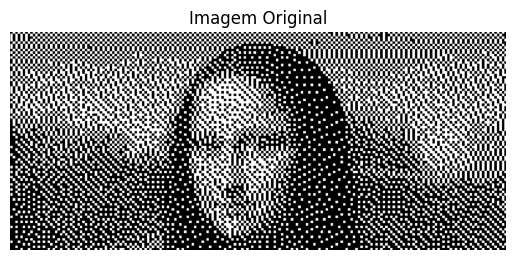

In [74]:
url = "https://a.tulv.in/uploads/screenshot-from-2021-02-23-19-04-26.png"
img_alpha = imread(url)

plt.title('Imagem Original')
plt.imshow(img_alpha)
plt.axis('off')
plt.show()

In [75]:
img_alpha.shape #Pelo valor da terceira dimensão, sabemos que a imagem tem um canal alfa

(650, 1477, 4)

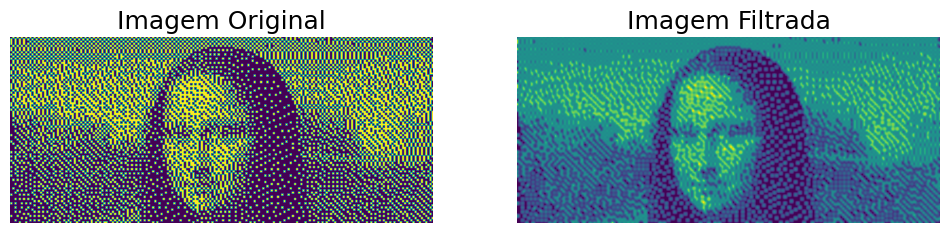

In [76]:
img = cv2.cvtColor(img_alpha, cv2.COLOR_BGR2GRAY).astype(np.float32);

filtragem  = cv2.blur(src=img,ksize=(13,13))

fig, axes = pylab.subplots(ncols=2, sharex=True, sharey=True, figsize=(12,6))

# Configurando o plot da imagem original
axes[0].set_title('Imagem Original', size=18)
axes[0].imshow(img)

# Configurando o plot da imagem filtrada
axes[1].set_title('Imagem Filtrada', size=18)
axes[1].imshow(filtragem)

for ax in axes:
    ax.axis('off')

pylab.show()

É visível a olho nu que a imagem que sofreu o filtro blur é mais borrada.

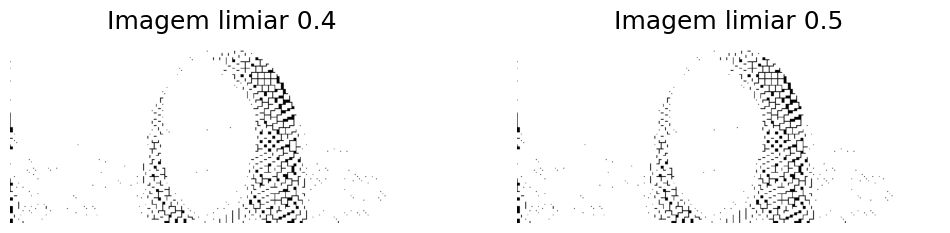

In [77]:
threshold_value = 0.4
thresholded_image_point_four = np.where(filtragem >= threshold_value, 1.0, 0.0)

threshold_value = 0.5
thresholded_image_point_five = np.where(filtragem >= threshold_value, 1.0, 0.0)

fig, axes = pylab.subplots(ncols=2, sharex=True, sharey=True, figsize=(12,6))

axes[0].set_title('Imagem limiar 0.4', size=18)
axes[0].imshow(thresholded_image_point_four, cmap='gray')

axes[1].set_title('Imagem limiar 0.5', size=18)
axes[1].imshow(thresholded_image_point_five, cmap='gray')

for ax in axes:
    ax.axis('off')

A imagem que sofreu o filtro blur foi submetida a uma binarização com limiares 0.4 e 0.5, o que levou às imagens acima. A binarização com limiar faz com que regiões da imagem se mesclem quando forem similares, sendo que a similaridade é definida pela segmentação de pixels cuja intensidade são ou maiores ou menores do que o limiar. Com uma diferença tão pequena entre os limiares é difícil notar uma diferença a olho nu entre as 2 imagens. Mas conforme o limiar aumenta progressivamente, a imagem resultante da binarização ressalta cada vez mais os traços mais destoantes da imagem.

# Enunciado 4

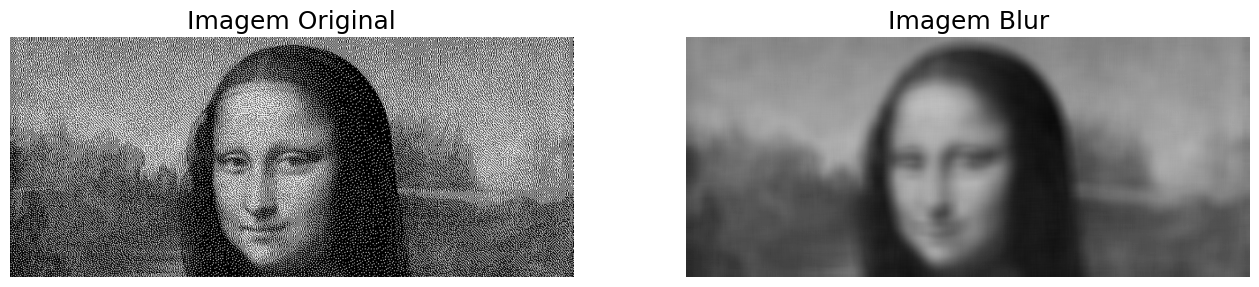

In [78]:
# Carregar a imagem da URL
url = "https://a.tulv.in/uploads/screenshot-from-2021-02-23-18-54-34.png"
img_alpha = imread(url)
image = cv2.cvtColor(img_alpha, cv2.COLOR_BGR2GRAY).astype(np.float32)

# Aplicar o filtro Blur (kernel = 47x47)
filtragem = cv2.blur(image, (47, 47), 0)

# Exibir as imagens
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(16, 10))

axes[0].set_title('Imagem Original', size=18)
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].axis('off')

axes[1].set_title('Imagem Blur', size=18)
axes[1].imshow(filtragem, cmap='gray', vmin=0, vmax=255)
axes[1].axis('off')

plt.show()

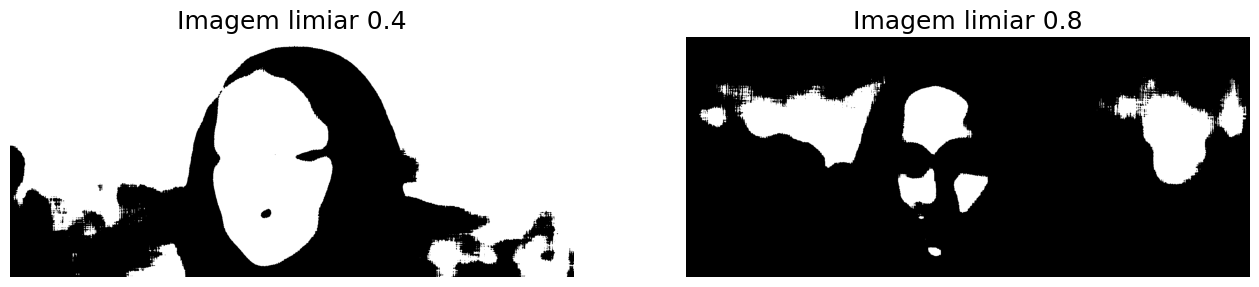

In [79]:
normalized = cv2.normalize(filtragem, None, 0, 255, cv2.NORM_MINMAX)

# Binarizar a imagem com limiar 0.4 e 0.8
threshold_1 = 0.4
thresholded_1 = np.where(normalized >= threshold_1 * 255, 255, 0).astype(np.float32)

threshold_2 = 0.8
thresholded_2 = np.where(normalized >= threshold_2 * 255, 255, 0).astype(np.float32)

# Exibir as imagens binarizadas
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(16, 10))

axes[0].set_title('Imagem limiar 0.4', size=18)
axes[0].imshow(thresholded_1, cmap='gray', vmin=0, vmax=255)
axes[0].axis('off')

axes[1].set_title('Imagem limiar 0.8', size=18)
axes[1].imshow(thresholded_2, cmap='gray', vmin=0, vmax=255)
axes[1].axis('off')

plt.show()


Com base na comparação das imagens binarizadas com limiares de 0,4 e 0,8, é perceptível que a grande maioria dos pixels na imagem da Mona Lisa possui valor de intensidade menor que 0,8 * 255 e maior que 0.4 * 255, já que a imagem com limiar 0.4 é majoritariamente branca e a imagem com limiar 0.8 é majoritariamente preta.


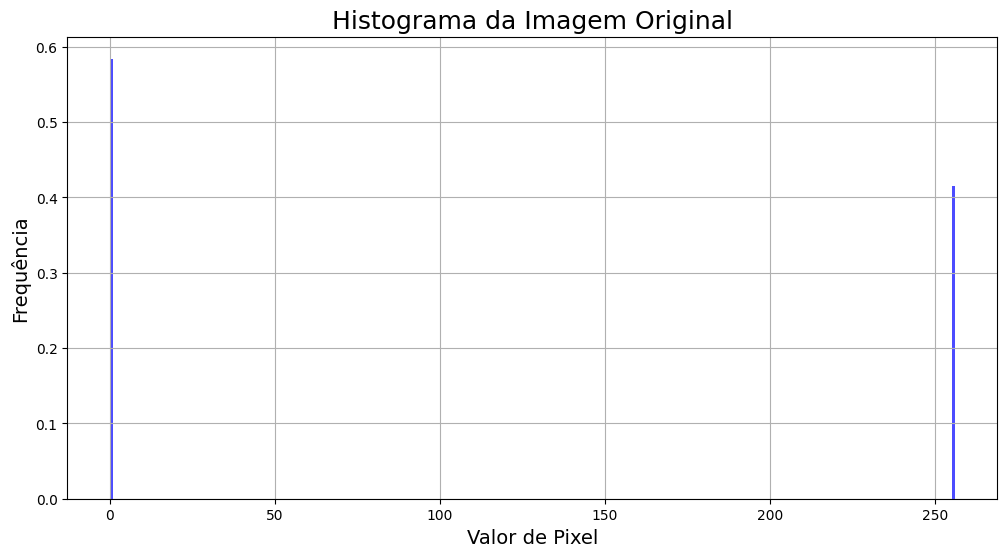

In [80]:
# Plote o histograma da imagem filtrada pelo filtro Blur
plt.figure(figsize=(12, 6))
plt.title('Histograma da Imagem Original', size=18)
plt.hist(image.ravel(), bins=256, range=(0, 256), density=True, color='blue', alpha=0.7)
plt.xlabel('Valor de Pixel', size=14)
plt.ylabel('Frequência', size=14)
plt.grid()
plt.show()


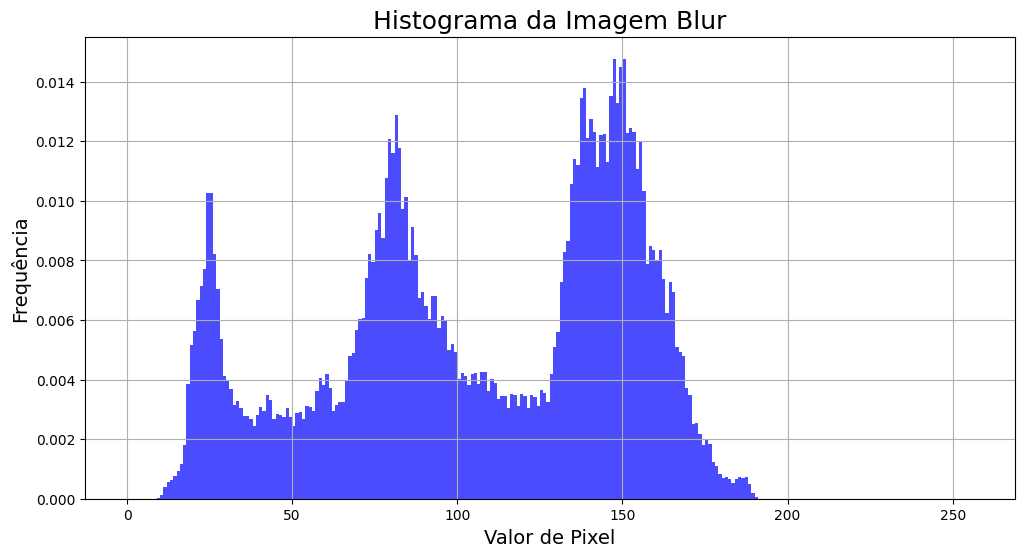

In [81]:
# Plote o histograma da imagem filtrada pelo filtro Blur
plt.figure(figsize=(12, 6))
plt.title('Histograma da Imagem Blur', size=18)
plt.hist(filtragem.ravel(), bins=256, range=(0, 256), density=True, color='blue', alpha=0.7)
plt.xlabel('Valor de Pixel', size=14)
plt.ylabel('Frequência', size=14)
plt.grid()
plt.show()


O filtro blur suaviza a intensidade dos pixels de uma imagem, então quando é aplicado a uma imagem binarizada (a imagem original) a variação de intensidades aumenta, já que as intensidades 0 e 1 são suavizadas. É possível notar também que no resultado final a concentração de intensidade está mais para o lado preto (0) do histograma, representando uma imagem de tom cinza.

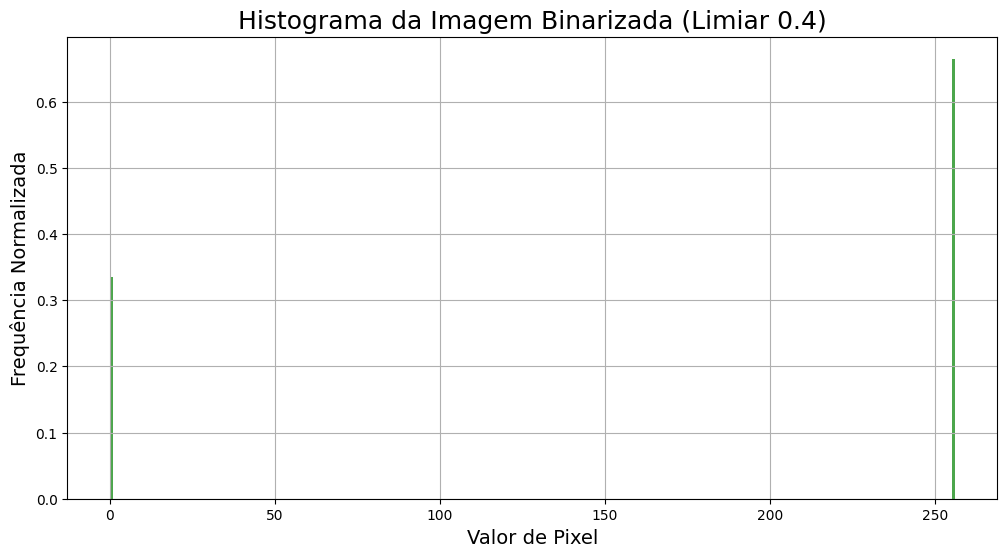

In [82]:
# Histograma da imagem produzida pela binarização (limiar 0.4)
plt.figure(figsize=(12, 6))
plt.title('Histograma da Imagem Binarizada (Limiar 0.4)', size=18)
plt.hist(thresholded_1.ravel(), bins=256, range=(0, 256), density=True, color='green', alpha=0.7)
plt.xlabel('Valor de Pixel', size=14)
plt.ylabel('Frequência Normalizada', size=14)
plt.grid()
plt.show()

O histograma da imagem binarizada só confirma as duas intensidades presentes na imagem, que por ser binarizada, é composta por pixels de intensidade 0 (preto) e 255 (branco).

# Enunciado 5

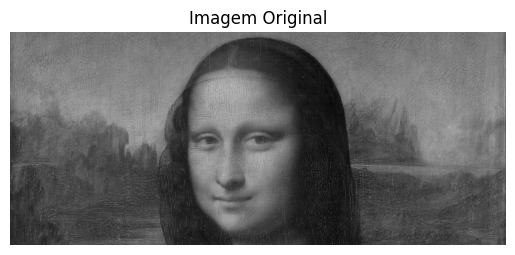

In [83]:
url = "https://a.tulv.in/uploads/screenshot-from-2021-02-23-18-38-08-copy.png"
img_alpha = imread(url)

plt.title('Imagem Original')
plt.imshow(img_alpha)
plt.axis('off')
plt.show()

In [84]:
img_alpha.shape #Pelo valor da terceira dimensão, sabemos que a imagem tem um canal alfa

(700, 1631, 4)

In [85]:
img = cv2.cvtColor(img_alpha, cv2.COLOR_BGR2GRAY).astype(np.float32);

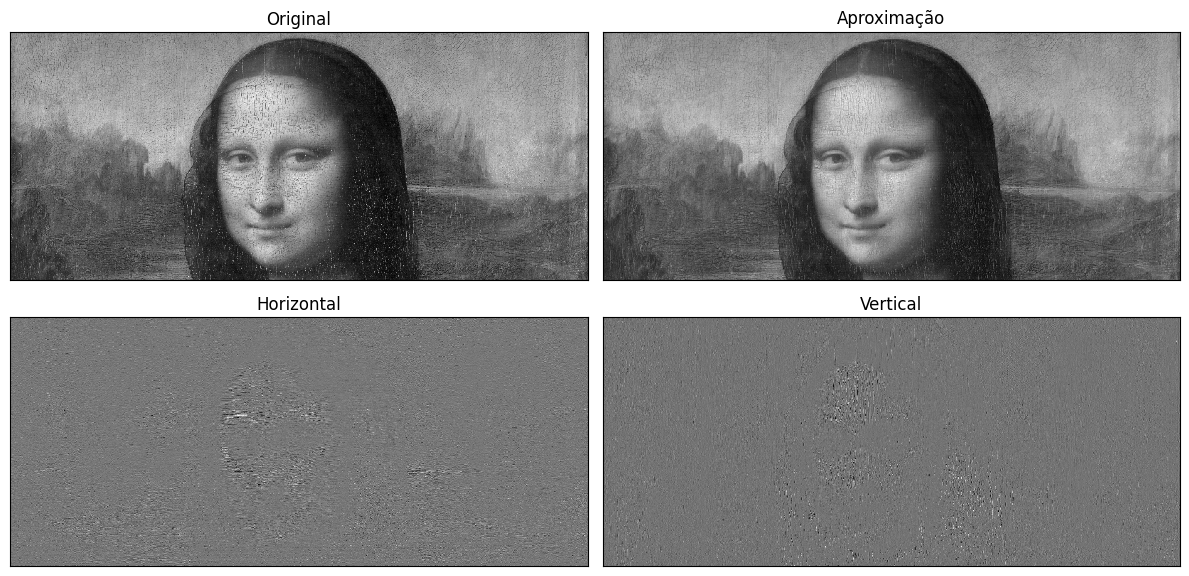

In [86]:
# Extrai os coeficientes da transformada em subbandas
coeffs = pywt.dwt2(img, 'db4')
LL, (LH, HL, HH) = coeffs

fig = plt.figure(figsize=(12, 6))
titles = ['Original', 'Aproximação', 'Horizontal', 'Vertical']

# Loop para plotar cada subbanda
for i, a in enumerate([img, LL, LH, HL]):
    # Define o número de linhas e colunas da grade
    rows = 2
    cols = 2

    # Adiciona a subplot atual à grade
    ax = fig.add_subplot(rows, cols, i + 1)

    # Plota a subbanda atual
    ax.imshow(a, interpolation='nearest', cmap=plt.cm.gray)

    # Define o título da subplot
    ax.set_title(titles[i], fontsize=12)

    # Remove os ticks dos eixos x e y
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()  # Ajusta automaticamente a disposição das subplots
plt.show()


Na subbanda LL, os pixels de intensidade mais baixa são amenizados tanto na vertical quanto na horizontal, é possível ver isso na imagem Aproximada porque a impressão de profundidade de uma imagem é dada pelo uso estratégico de pixels mais escuros, pelo uso de sombra, e com a suavização dos pixels de intensidade mais baixa (mais escuros), temos a impressão que estamos mais próximos da imagem, porque diminuímos sua profundidade. Além da impressão de estarmos mais próximos da imagem, também é possível notar diminuição de ruídos.

Na imagem Horizontal(LH), é possível ver a bordas do sombreamento dos olhos da Mona, visto que a intensidade dos pixels do olho da Mona é alto, e na subbanda da LH os pixels de intensidade alta são ressaltados no eixo horizontal.

Na imagem Vertical(HL), é possível ver a forma do cabelo de Mona porque os pixels de intensidade mais baixa (mais escuros) são ressaltados no eixo vertical (eixo que o cabelo de Mona segue)


# Enunciado 6

In [87]:
# URL da imagem base
url = "https://cdn.pixabay.com/photo/2017/09/16/19/33/parrot-2756488_1280.jpg"

response = requests.get(url)
image_data = BytesIO(response.content)

image = Image.open(image_data)

image.save('original.png', 'PNG')

# URL da imagem referência
url = "https://cdn.pixabay.com/photo/2017/08/30/12/45/girl-2696947_1280.jpg"

response = requests.get(url)
image_data = BytesIO(response.content)

image = Image.open(image_data)

image.save('reference.png', 'PNG')

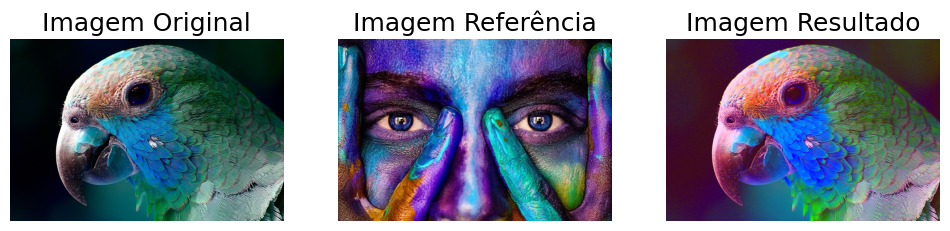

In [88]:
base = np.array(Image.open('/content/original.png'))
base = cv2.cvtColor(base, cv2.COLOR_BGR2RGB)

reference = np.array(Image.open('/content/reference.png'))
reference = cv2.cvtColor(reference, cv2.COLOR_BGR2RGB)

content   = np.array(base)
reference = np.array(reference)

nova_imagem = colortrans.transfer_lhm(content, reference)
resultado = Image.fromarray(nova_imagem)
resultado = np.array(resultado)

fig, axes = pylab.subplots(ncols=3, sharex=True, sharey=True, figsize=(12,6))

# Configurando o plot da imagem original
axes[0].set_title('Imagem Original', size=18)
axes[0].imshow(base)

# Configurando o plot da imagem filtrada
axes[1].set_title('Imagem Referência', size=18)
axes[1].imshow(reference)


# Configurando o plot da imagem filtrada
axes[2].set_title('Imagem Resultado', size=18)
axes[2].imshow(resultado)

for ax in axes:
    ax.axis('off')

pylab.show()

Na transferência de cores, a imagem original recebe cores da imagem de referência como sobreposição. É possível notar que na imagem resultado, o objeto da imagem original permaneceu, no entanto, as cores primárias da imagem referência foram sobrepostas na imagem original, a imagem que antes tinha um tom pastel agora tem cores mais quentes.

# Enunciado 7

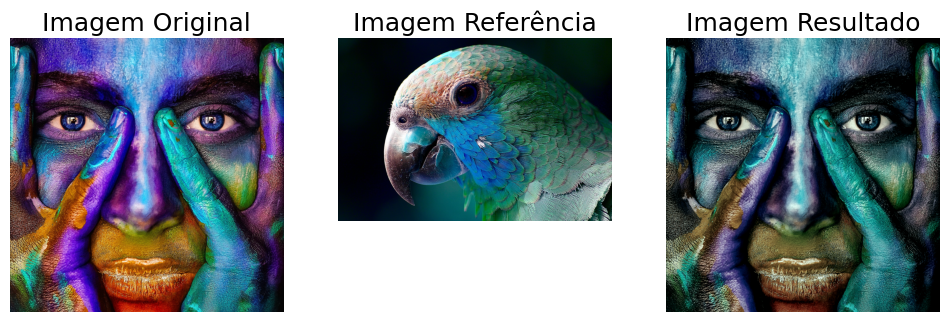

In [89]:
base = np.array(Image.open('/content/reference.png'))
base = cv2.cvtColor(base, cv2.COLOR_BGR2RGB)

reference = np.array(Image.open('/content/original.png'))
reference = cv2.cvtColor(reference, cv2.COLOR_BGR2RGB)

content   = np.array(base)
reference = np.array(reference)

nova_imagem = colortrans.transfer_lhm(content, reference)
resultado = Image.fromarray(nova_imagem)
resultado = np.array(resultado)

fig, axes = pylab.subplots(ncols=3, sharex=True, sharey=True, figsize=(12,6))

# Configurando o plot da imagem original
axes[0].set_title('Imagem Original', size=18)
axes[0].imshow(base)

# Configurando o plot da imagem filtrada
axes[1].set_title('Imagem Referência', size=18)
axes[1].imshow(reference)

# Configurando o plot da imagem filtrada
axes[2].set_title('Imagem Resultado', size=18)
axes[2].imshow(resultado)

for ax in axes:
    ax.axis('off')

pylab.show()

Nesse anunciado, as imagens original e referência vão apenas trocar os papéis. A transferência de cores, a imagem original recebe cores da imagem de referência como sobreposição. É possível notar que na imagem resultado, o objeto da imagem original permaneceu, no entanto, as cores primárias da imagem referência foram sobrepostas na imagem original, a imagem que antes tinha cores mais quentes agora apresenta cores mais frias.

# Enunciado 8

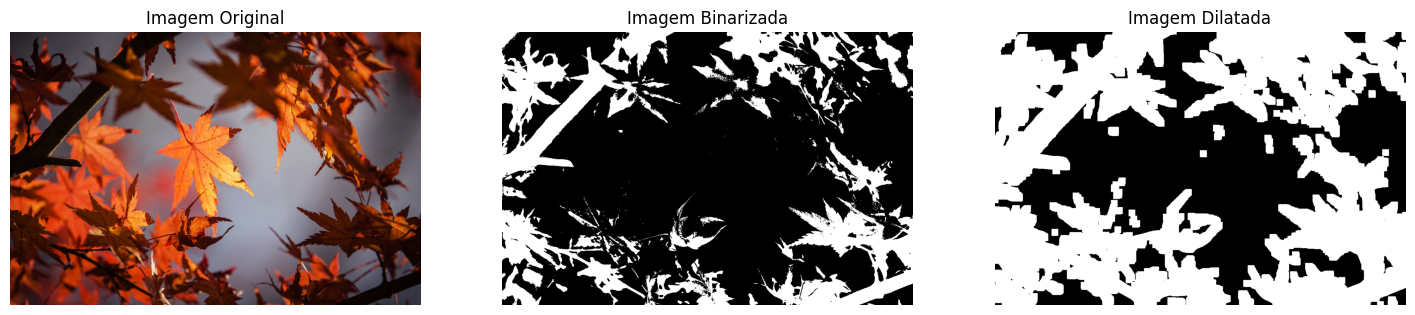

In [90]:
# Kernel 3x3 e Imagem Dilatada para iterations=10

# Link da imagem
img_url = "https://cdn.pixabay.com/photo/2016/05/25/18/02/maple-1415541_1280.jpg"
response = requests.get(img_url)
img_data = BytesIO(response.content)
img_pil = Image.open(img_data)

gray_img = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2GRAY)

# Condição rgb2gray(img_load) < 0.15
threshold = 0.15
binary_img = (gray_img < threshold * 255).astype(np.uint8) * 255

binary_img = binary_img.astype(np.uint8)

# kernel (3, 3) usando MORPH_RECT
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Dilatação para iterations=10
dilated_img = cv2.dilate(binary_img, kernel, iterations=10)

# Mostrar as imagens em um subplot
plt.figure(figsize=(18, 18))
plt.subplot(1, 3, 1)
plt.title("Imagem Original")
plt.imshow(img_pil)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Imagem Binarizada")
plt.imshow(binary_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Imagem Dilatada")
plt.imshow(dilated_img, cmap='gray')
plt.axis('off')

plt.show()

No primeiro plot encontramos a imagem original com as suas cores quentes, logo em seguida é vista a imagem binarizada, na qual, apresenta apenas as cores preto e branco, e por fim sobre a imagem binarizada aplicamos uma operação morfológica de dilatação fazendo uso de 10 interações, na qual, podemos visualizar que as bordas inicias, as partes brancas, da imagem ficam mais dilatadas, ou seja, mais “largas”.

# Enunciado 9

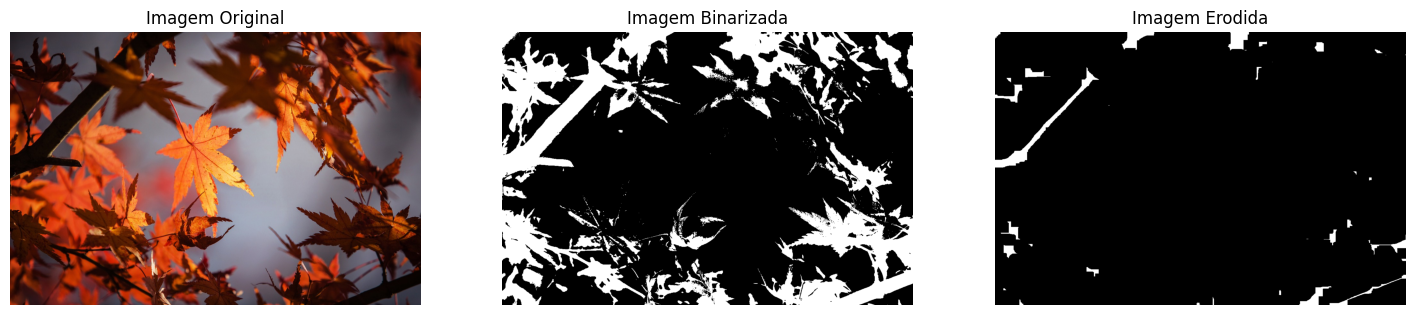

In [91]:
# Kernel 3x3 e Imagem Erodida para iterations=15

# Link da imagem
img_url = "https://cdn.pixabay.com/photo/2016/05/25/18/02/maple-1415541_1280.jpg"
response = requests.get(img_url)
img_data = BytesIO(response.content)
img_pil = Image.open(img_data)

gray_img = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2GRAY)

# Condição rgb2gray(img_load) < 0.15
threshold = 0.15
binary_img = (gray_img < threshold * 255).astype(np.uint8) * 255

binary_img = binary_img.astype(np.uint8)

# kernel (3, 3) usando MORPH_RECT
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Erosão para iterations=15
erode_img = cv2.erode(binary_img, kernel, iterations=15)

# Mostrar as imagens em um subplot
plt.figure(figsize=(18, 18))
plt.subplot(1, 3, 1)
plt.title("Imagem Original")
plt.imshow(img_pil)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Imagem Binarizada")
plt.imshow(binary_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Imagem Erodida")
plt.imshow(erode_img, cmap='gray')
plt.axis('off')

plt.show()


Na questão 9 é utilizado os mesmos dados da questão 8, apenas alterando na operação morfológica, que antes era dilatação agora é erosão. O primeiro plot encontramos a imagem original com as suas cores quentes, logo em seguida é vista a imagem binarizada, na qual, apresenta apenas as cores preto e branco, e por fim sobre a imagem binarizada aplicamos uma operação morfológica de erosão com 15 interações, na qual, podemos visualizar que as bordas iniciais, as partes brancas, da imagem ficam mais encolhidas, ou seja, mais “finas”.

# Enunciado 10

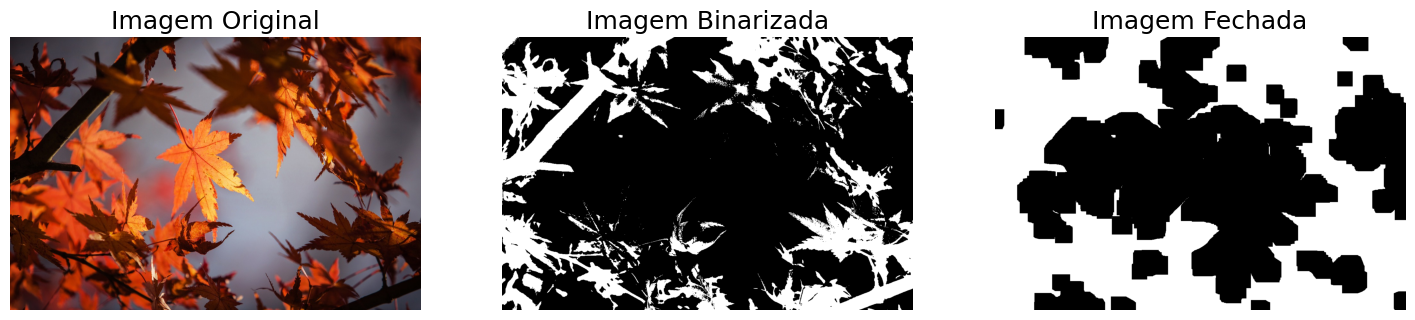

In [92]:
# Kernel 47x47 e Imagem com Fechamento

# Link da imagem
url = "https://cdn.pixabay.com/photo/2016/05/25/18/02/maple-1415541_1280.jpg"
response = requests.get(url)
img_data = np.asarray(bytearray(response.content), dtype=np.uint8)
img = cv2.imdecode(img_data, cv2.IMREAD_COLOR)

# Condição rgb2gray(img_load) < 0.15
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32)
img_bin = np.where(img_gray < 0.15 * 255, 255, 0).astype(np.uint8)

img_bin = img_bin.astype(np.uint8)

# kernel (47,47)
kernel_47x47 = cv2.getStructuringElement(cv2.MORPH_RECT, (47, 47))

# Aplicação dos elementos de fechamento na imagem
img_closed = cv2.morphologyEx(img_bin, cv2.MORPH_CLOSE, kernel_47x47)

# Mostre as imagens em um subplot
plt.figure(figsize=(18, 18))
plt.subplot(1, 3, 1)
plt.title("Imagem Original", size=18)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Imagem Binarizada", size=18)
plt.imshow(img_bin, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Imagem Fechada", size=18)
plt.imshow(img_closed, cmap='gray')
plt.axis('off')

plt.show()

Na questão 10 é utilizado os mesmos dados da questão 8, apenas alterando na operação morfológica, que antes era dilatação, agora é fechamento. O primeiro plot encontramos a imagem original com as suas cores quentes, logo em seguida é vista a imagem binarizada, na qual, apresenta apenas as cores preto e branco, e por fim sobre a imagem binarizada aplicamos uma operação morfológica de fechamento da imagem, a qual combina a dilatação seguida da erosão. Assim, podemos visualizar a suavização das bordas das folhas e a união de regiões adjacentes e de mesma intensidade.


# Enunciado 11

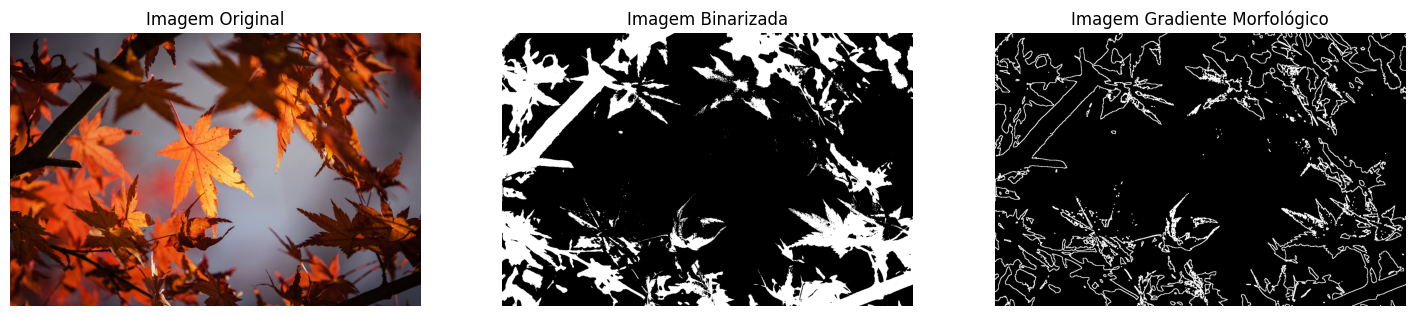

In [93]:
# Kernel 3x3 e Imagem com gradiente morfológico

# Link da imagem
img_url = "https://cdn.pixabay.com/photo/2016/05/25/18/02/maple-1415541_1280.jpg"
response = requests.get(img_url)
img_data = BytesIO(response.content)
img_pil = Image.open(img_data)

gray_img = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2GRAY)

# Condição rgb2gray(img_load) < 0.15
threshold = 0.15
binary_img = (gray_img < threshold * 255).astype(np.uint8) * 255

binary_img = binary_img.astype(np.uint8)

# Obter um kernel (3, 3) usando MORPH_RECT
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Aplicar o gradiente
gradient_image = cv2.morphologyEx(binary_img, cv2.MORPH_GRADIENT, kernel)

# 7. Mostrar as imagens em um subplot
plt.figure(figsize=(18, 18))
plt.subplot(1, 3, 1)
plt.title("Imagem Original")
plt.imshow(img_pil)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Imagem Binarizada")
plt.imshow(binary_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Imagem Gradiente Morfológico")
plt.imshow(gradient_image , cmap='gray')
plt.axis('off')

plt.show()

Na questão 11 é utilizado os mesmos dados da questão 8, apenas alterando na operação morfológica, que antes era dilatação, agora é aplicação do gradiente morfológico. O primeiro plot encontramos a imagem original com as suas cores quentes, logo em seguida é vista a imagem binarizada, na qual, apresenta apenas as cores preto e branco, e por fim sobre a imagem binarizada aplicamos uma operação morfológica de gradiente, na qual, é feita realce de contorno de objetos com base na variação de intensidade de pixels adjacentes. Assim, podemos visualizar uma forma oca das folhas e galhos, apenas o contorno do objeto.

# Enunciado 12

In [94]:
# Importações
import tensorflow as tf

# Carregando a base de dados
mnist = tf.keras.datasets.mnist

# Carregando o conjunto de treinamento e o conjunto de teste
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Execução 1

In [95]:
# Estruturando a arquitetura da rede/ modelo
model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(784, activation=tf.nn.tanh),
 tf.keras.layers.Dense(393, activation=tf.nn.tanh),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compilando o modelo
## Utiliza o otimizador ADAM
## Função de perda: sparse_categorical_crossentropy
## Métrica empregada: accuracy

model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

# Treinamento do modelo com 7 épocas
model.fit(x_train, y_train, epochs=7, verbose = 1)

Epoch 1/7
1875/1875 [==============================] - 47s 23ms/step - loss: 0.2314 - accuracy: 0.9294
Epoch 2/7
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1091 - accuracy: 0.9663
Epoch 3/7
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0849 - accuracy: 0.9733
Epoch 4/7
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0662 - accuracy: 0.9788
Epoch 5/7
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0563 - accuracy: 0.9821
Epoch 6/7
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0487 - accuracy: 0.9843
Epoch 7/7
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0420 - accuracy: 0.9854


In [96]:
# Avaliação do modelo
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0762 - accuracy: 0.9764


[0.07616524398326874, 0.9764000177383423]

## Execução 2

In [97]:
# Estruturando a arquitetura da rede/ modelo
model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(784, activation=tf.nn.tanh),
 tf.keras.layers.Dense(393, activation=tf.nn.tanh),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compilando o modelo
## Utiliza o otimizador ADAM
## Função de perda: sparse_categorical_crossentropy
## Métrica empregada: accuracy

model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

# Treinamento do modelo com 7 épocas
model.fit(x_train, y_train, epochs=7, verbose = 1)

Epoch 1/7
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2306 - accuracy: 0.9296
Epoch 2/7
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1092 - accuracy: 0.9660
Epoch 3/7
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0812 - accuracy: 0.9743
Epoch 4/7
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0678 - accuracy: 0.9784
Epoch 5/7
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0566 - accuracy: 0.9816
Epoch 6/7
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0474 - accuracy: 0.9843
Epoch 7/7
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0419 - accuracy: 0.9860


In [98]:
# Avaliação do modelo
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 10ms/step - loss: 0.0877 - accuracy: 0.9736


[0.08766000717878342, 0.9735999703407288]

As mudanças feitas para otimizar o modelo foram: aumento no número de neurônios de entrada em cada camada e aumento no número de épocas. O aumento do número de neurônios foi feito para evitar a perda de informações e aumentar a flexibilidade do modelo, e o aumento do número de épocas para aumentar chances de aprendizado, mas não tanto para causar overfitting.

**Neurônios:**
*   De 100 para 784
*   De 50 para 393

**Épocas:**
* De 3 para 7


**Resultados:**
* *Execução 1:* De Perda: 0.101 Acurácia: 96.93 para Perda: 0.0762 Acurácia: 97.64

* *Execução 2:* De Perda: 0.098 Acurácia: 97.09 para Perda: 0.0877 Acurácia: 97.36

## Seção de Resultados

Segue abaixo uma tabela com os valores de perda e acurácia para 2 execuções, junto aos dados de teste e com a arquitetura sugerida pelo enunciado. </p>

|   Execução  | Perda (%) | Acurácia (%) |
|:-----------:|:-----:|:--------:|
|      1      |  0,0749 |   97,70  |
|      2      |  0,086 |   97,49  |

- Aplique melhorias ao código, de forma que seu resultado supere a estrutura fornecida.

- Realize 2 execuções de sua estrutura proposta.

- Forneça em seu relatório uma tabela com seus resultados obtidos (Perda e Acurácia) para as duas execuções de sua arquitetura.

- Anexe seu código, de forma legível, à seção de resposta desta questão no relatório.